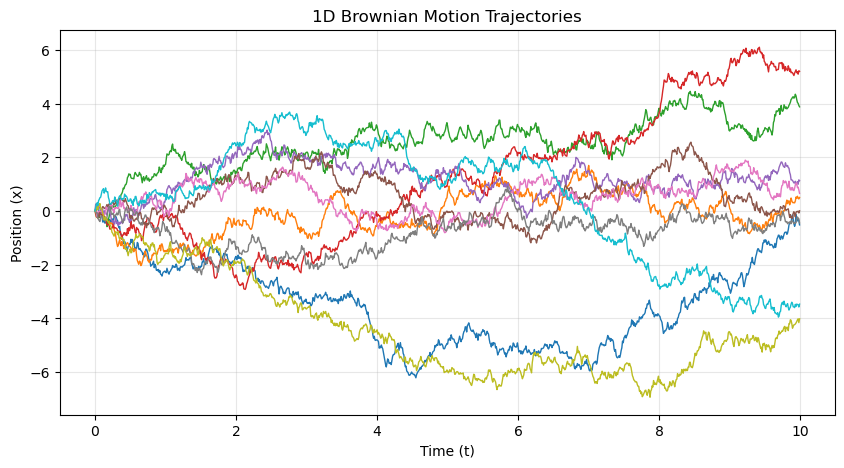

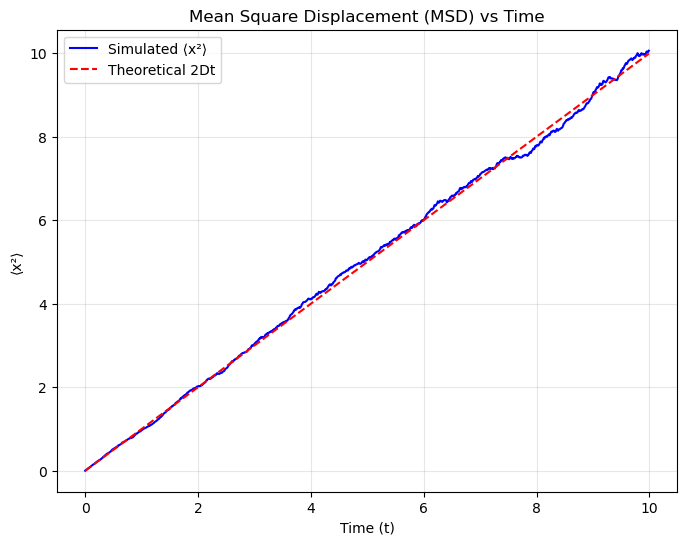

Simulated diffusion coefficient (fit check): D = 0.505
✅ Simulation completed successfully.


In [1]:
# -*- coding: utf-8 -*-
"""
1D_Brownian_Motion.ipynb

Brownian Motion Simulation (1D)
---------------------------------
Author: Petros Agridos
Description:
This script simulates 1D Brownian motion (random walk) for many particles and visualizes:
- Individual trajectories
- Mean square displacement (MSD)
- Comparison with Einstein's theoretical prediction: <x²> = 2 D t
"""

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Parameters
# ------------------------------
N_particles = 1000     # number of particles
N_steps = 1000         # number of time steps
dt = 1e-2              # time step (arbitrary units)
D = 0.5                # diffusion coefficient

# Standard deviation of step from Einstein's relation σ² = 2 D Δt
sigma = np.sqrt(2 * D * dt)

# ------------------------------
# Simulation
# ------------------------------
# Each particle starts at x = 0
positions = np.zeros((N_particles, N_steps))

for i in range(1, N_steps):
    # Gaussian-distributed random step for each particle
    steps = np.random.normal(0, sigma, N_particles)
    positions[:, i] = positions[:, i - 1] + steps

# Time array
time = np.arange(N_steps) * dt

# ------------------------------
# Mean Square Displacement
# ------------------------------
msd = np.mean(positions**2, axis=0)

# Theoretical MSD
msd_theoretical = 2 * D * time

# ------------------------------
# Visualization
# ------------------------------

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(time, positions[i, :], lw=1)
plt.title("1D Brownian Motion Trajectories")
plt.xlabel("Time (t)")
plt.ylabel("Position (x)")
plt.grid(alpha=0.3)
plt.show()

# MSD plot
plt.figure(figsize=(8, 6))
plt.plot(time, msd, 'b-', label="Simulated ⟨x²⟩")
plt.plot(time, msd_theoretical, 'r--', label="Theoretical 2Dt")
plt.title("Mean Square Displacement (MSD) vs Time")
plt.xlabel("Time (t)")
plt.ylabel("⟨x²⟩")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------
# Print summary
# ------------------------------
print(f"Simulated diffusion coefficient (fit check): D = {np.mean(msd[-100:]/(2*time[-100:])):.3f}")
print("✅ Simulation completed successfully.")
